In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
from keras.applications import VGG16, Xception
from keras.applications.vgg16 import preprocess_input, decode_predictions

2024-05-22 16:08:58.100331: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
model = VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

In [2]:
model = Xception(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

2024-05-22 16:11:02.685824: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


91884032/91884032 [==============================] - 9s 0us/step


In [9]:
img_path = 'cat.jpg'

img = load_img(img_path, target_size=(299, 299))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)


preds = model.predict(x, verbose=0)
decoded = decode_predictions(preds, top=1)[0]

1/1 [==============================] - 0s 221ms/step


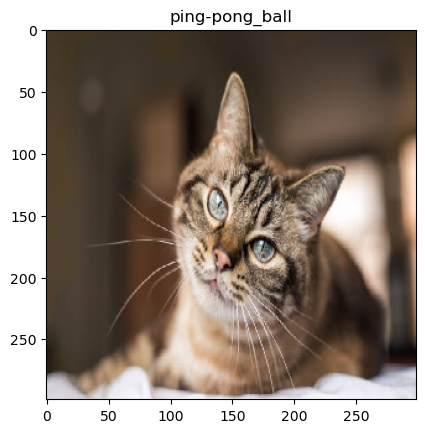

In [10]:
plt.imshow(img)
plt.title(decoded[0][1])
plt.show()

# Fashion Mnist

In [5]:
# Primeiro, certifique-se de que você tem as bibliotecas necessárias instaladas.
# !pip install tensorflow

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Carregar o dataset Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Redimensionar as imagens para 28x28 e adicionar um canal extra (imagens em escala de cinza)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Normalizar as imagens
train_images, test_images = train_images / 255.0, test_images / 255.0

# Converter as labels para one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Construir o modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes no Fashion MNIST
])

# Compilar o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Avaliar o modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


Epoch 1/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.4970 - accuracy: 0.8168 - val_loss: 0.3934 - val_accuracy: 0.8541
Epoch 2/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.3227 - accuracy: 0.8830 - val_loss: 0.3297 - val_accuracy: 0.8759
Epoch 3/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2754 - accuracy: 0.9003 - val_loss: 0.2944 - val_accuracy: 0.8895
Epoch 4/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.2458 - accuracy: 0.9097 - val_loss: 0.2793 - val_accuracy: 0.8991
Epoch 5/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.2194 - accuracy: 0.9188 - val_loss: 0.2672 - val_accuracy: 0.9038
Epoch 6/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.2012 - accuracy: 0.9258 - val_loss: 0.2561 - val_accuracy: 0.9069
Epoch 7/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.1834 - accuracy: 0.9313 - val_loss: 0.2561 -

In [6]:
model.save('fashion_mnist_model.h5')

### Predição do Fashion MNIST com o MobileNetV2

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_test = np.array([np.tile(np.resize(img, (96, 96)), (3, 1, 1)).transpose(1, 2, 0) for img in x_test])
x_test = x_test / 255.0
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(96, 96, 3)))
base_model.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

print('Predicted classes for the first 10 test images:', predicted_classes[:10])


313/313 [==============================] - 175s 556ms/step
Predicted classes for the first 10 test images: [4 4 4 4 4 4 4 4 4 4]


In [18]:
x_test[0, :, :, 1].shape

(96, 96)

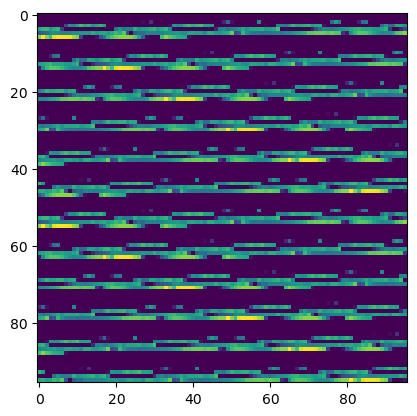

In [19]:
plt.imshow(x_test[0, :, :, 1])
# plt.title(decoded[0][1])
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Carregar o dataset Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Redimensionar as imagens para 3 canais (RGB)
train_images = np.stack((train_images,) * 3, axis=-1)
test_images = np.stack((test_images,) * 3, axis=-1)

# Redimensionar as imagens para 224x224 (necessário para MobileNetV2)
train_images = np.array([tf.image.resize(image, (224, 224)) for image in train_images])
test_images = np.array([tf.image.resize(image, (224, 224)) for image in test_images])

# Normalizar as imagens
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convertendo as labels para one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Carregar o modelo pré-treinado MobileNetV2 sem a camada de saída
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar as camadas do modelo base
base_model.trainable = False

# Adicionar camadas finais personalizadas
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 classes no Fashion MNIST
])

# Compilar o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Avaliar o modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Plotar a acurácia e a perda
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [1]:
# Primeiro, certifique-se de que você tem as bibliotecas necessárias instaladas.
# !pip install opencv-python numpy torch torchvision

import cv2
import torch
import numpy as np

# Carregue o modelo YOLOv5 da Ultralytics.
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Abra a webcam.
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Erro ao abrir a webcam.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        print("Erro ao capturar frame.")
        break

    # Realize a detecção usando YOLOv5.
    results = model(frame)

    # Renderize os resultados na imagem.
    results.render()  # Os resultados são desenhados diretamente na imagem.

    # Mostre a imagem com as detecções.
    cv2.imshow('YOLOv5 Webcam', np.squeeze(results.render()))

    # Pressione 'q' para sair do loop.
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Libere o objeto de captura de vídeo e feche as janelas.
cap.release()
cv2.destroyAllWindows()


/home/lucas/anaconda3/lib/python3.11/site-packages/torch/hub.py:293: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/lucas/.cache/torch/hub/master.zip


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.9/757.9 kB 6.5 MB/s eta 0:00:008.2 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 13.6 MB/s eta 0:00:00m eta 0:00:010:01:01
requirements: Ultralytics requirements ['gitpython>=3.1.30', 'pillow>=10.3.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 3.3 MB/s eta 0:00:004.6 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 10.9 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 14.0 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0

requirements: AutoUpdate success ✅ 6.9s, installed 2 packages: ['gitpython>=3.1.30', 'pillow>=10.3.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2024-5-22 Python-3.11.5 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce MX150, 2001MiB)

100%|██████████| 14.1M/14.1M [00:01<00:00, 11.2MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
QObject::moveToThread: Current thread (0x150134b0) is not the object's thread (0x150b5070).
Cannot move to target thread (0x150134b0)

QObject::moveToThread: Current thread (0x150134b0) is not the object's thread (0x150b5070).
Cannot move to target thread (0x150134b0)

QObject::moveToThread: Current thread (0x150134b0) is not the object's thread (0x150b5070).
Cannot move to target thread (0x150134b0)

QObject::moveToThread: Current thread (0x150134b0) is not the object's thread (0x150b5070).
Cannot move to target thread (0x150134b0)

QObject::moveToThread: Current thread (0x150134b0) is not the object's thread (0x150b5070).
Cannot move to target thread (0x150134b0)

QObject::moveToThread: Current thread (0x150134b0) is not the objec

In [20]:
# Primeiro, certifique-se de que você tem as bibliotecas necessárias instaladas.
# !pip install opencv-python numpy ultralytics

import cv2
import numpy as np
from ultralytics import YOLO

# Carregue o modelo YOLOv8 da Ultralytics.
model = YOLO('yolov8s.pt', verbose=0)

# Abra a webcam.
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Erro ao abrir a webcam.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        print("Erro ao capturar frame.")
        break

    # Realize a detecção usando YOLOv8.
    results = model(frame)

    # Renderize os resultados na imagem.
    annotated_frame = results[0].plot()

    # Mostre a imagem com as detecções.
    cv2.imshow('YOLOv8 Webcam', annotated_frame)

    # Pressione 'q' para sair do loop.
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Libere o objeto de captura de vídeo e feche as janelas.
cap.release()
cv2.destroyAllWindows()



0: 480x640 1 person, 40.7ms
Speed: 2.7ms preprocess, 40.7ms inference, 2.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 39.7ms
Speed: 1.6ms preprocess, 39.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 38.6ms
Speed: 2.0ms preprocess, 38.6ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 38.6ms
Speed: 1.7ms preprocess, 38.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)



QObject::moveToThread: Current thread (0x10103ac0) is not the object's thread (0x101abc50).
Cannot move to target thread (0x10103ac0)

QObject::moveToThread: Current thread (0x10103ac0) is not the object's thread (0x101abc50).
Cannot move to target thread (0x10103ac0)

QObject::moveToThread: Current thread (0x10103ac0) is not the object's thread (0x101abc50).
Cannot move to target thread (0x10103ac0)

QObject::moveToThread: Current thread (0x10103ac0) is not the object's thread (0x101abc50).
Cannot move to target thread (0x10103ac0)

QObject::moveToThread: Current thread (0x10103ac0) is not the object's thread (0x101abc50).
Cannot move to target thread (0x10103ac0)

QObject::moveToThread: Current thread (0x10103ac0) is not the object's thread (0x101abc50).
Cannot move to target thread (0x10103ac0)

QObject::moveToThread: Current thread (0x10103ac0) is not the object's thread (0x101abc50).
Cannot move to target thread (0x10103ac0)

QObject::moveToThread: Current thread (0x10103ac0) is n

0: 480x640 1 person, 38.3ms
Speed: 1.7ms preprocess, 38.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 37.1ms
Speed: 2.0ms preprocess, 37.1ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 37.2ms
Speed: 2.2ms preprocess, 37.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 37.3ms
Speed: 1.5ms preprocess, 37.3ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 37.4ms
Speed: 1.4ms preprocess, 37.4ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 37.3ms
Speed: 1.5ms preprocess, 37.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 37.3ms
Speed: 1.8ms preprocess, 37.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 37.1ms
Speed: 1.6ms preprocess, 37.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480

QObject::moveToThread: Current thread (0x10103ac0) is not the object's thread (0x101abc50).
Cannot move to target thread (0x10103ac0)

QObject::moveToThread: Current thread (0x10103ac0) is not the object's thread (0x101abc50).
Cannot move to target thread (0x10103ac0)

QObject::moveToThread: Current thread (0x10103ac0) is not the object's thread (0x101abc50).
Cannot move to target thread (0x10103ac0)

QObject::moveToThread: Current thread (0x10103ac0) is not the object's thread (0x101abc50).
Cannot move to target thread (0x10103ac0)

QObject::moveToThread: Current thread (0x10103ac0) is not the object's thread (0x101abc50).
Cannot move to target thread (0x10103ac0)

QObject::moveToThread: Current thread (0x10103ac0) is not the object's thread (0x101abc50).
Cannot move to target thread (0x10103ac0)

QObject::moveToThread: Current thread (0x10103ac0) is not the object's thread (0x101abc50).
Cannot move to target thread (0x10103ac0)

QObject::moveToThread: Current thread (0x10103ac0) is n

0: 480x640 1 person, 1 car, 37.7ms
Speed: 1.7ms preprocess, 37.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 car, 37.5ms
Speed: 2.4ms preprocess, 37.5ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 car, 38.0ms
Speed: 1.8ms preprocess, 38.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 2 cars, 37.7ms
Speed: 1.6ms preprocess, 37.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 37.8ms
Speed: 1.5ms preprocess, 37.8ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 2 cars, 37.7ms
Speed: 1.6ms preprocess, 37.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 37.6ms
Speed: 1.5ms preprocess, 37.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 37.7ms
Speed: 1.4ms preprocess, 37.7ms inference, 1.4ms post

QObject::moveToThread: Current thread (0x10103ac0) is not the object's thread (0x101abc50).
Cannot move to target thread (0x10103ac0)

QObject::moveToThread: Current thread (0x10103ac0) is not the object's thread (0x101abc50).
Cannot move to target thread (0x10103ac0)

QObject::moveToThread: Current thread (0x10103ac0) is not the object's thread (0x101abc50).
Cannot move to target thread (0x10103ac0)

QObject::moveToThread: Current thread (0x10103ac0) is not the object's thread (0x101abc50).
Cannot move to target thread (0x10103ac0)

QObject::moveToThread: Current thread (0x10103ac0) is not the object's thread (0x101abc50).
Cannot move to target thread (0x10103ac0)

QObject::moveToThread: Current thread (0x10103ac0) is not the object's thread (0x101abc50).
Cannot move to target thread (0x10103ac0)

QObject::moveToThread: Current thread (0x10103ac0) is not the object's thread (0x101abc50).
Cannot move to target thread (0x10103ac0)

QObject::moveToThread: Current thread (0x10103ac0) is n


0: 480x640 1 person, 1 car, 37.8ms
Speed: 1.5ms preprocess, 37.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 car, 37.7ms
Speed: 2.2ms preprocess, 37.7ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 car, 37.7ms
Speed: 2.4ms preprocess, 37.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 2 cars, 37.7ms
Speed: 1.5ms preprocess, 37.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 car, 37.5ms
Speed: 1.5ms preprocess, 37.5ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 2 cars, 37.7ms
Speed: 1.5ms preprocess, 37.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 car, 37.6ms
Speed: 1.7ms preprocess, 37.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 2 cars, 39.1ms
Speed: 1.8ms preprocess, 39.1m

QObject::moveToThread: Current thread (0x10103ac0) is not the object's thread (0x101abc50).
Cannot move to target thread (0x10103ac0)

QObject::moveToThread: Current thread (0x10103ac0) is not the object's thread (0x101abc50).
Cannot move to target thread (0x10103ac0)

QObject::moveToThread: Current thread (0x10103ac0) is not the object's thread (0x101abc50).
Cannot move to target thread (0x10103ac0)

QObject::moveToThread: Current thread (0x10103ac0) is not the object's thread (0x101abc50).
Cannot move to target thread (0x10103ac0)

QObject::moveToThread: Current thread (0x10103ac0) is not the object's thread (0x101abc50).
Cannot move to target thread (0x10103ac0)

QObject::moveToThread: Current thread (0x10103ac0) is not the object's thread (0x101abc50).
Cannot move to target thread (0x10103ac0)

QObject::moveToThread: Current thread (0x10103ac0) is not the object's thread (0x101abc50).
Cannot move to target thread (0x10103ac0)

QObject::moveToThread: Current thread (0x10103ac0) is n

0: 480x640 1 person, 1 car, 37.8ms
Speed: 2.3ms preprocess, 37.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 car, 37.9ms
Speed: 1.6ms preprocess, 37.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 car, 37.7ms
Speed: 1.4ms preprocess, 37.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 car, 37.9ms
Speed: 1.4ms preprocess, 37.9ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 car, 38.1ms
Speed: 1.4ms preprocess, 38.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 car, 38.2ms
Speed: 1.4ms preprocess, 38.2ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 car, 38.2ms
Speed: 1.4ms preprocess, 38.2ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 car, 38.0ms
Speed: 1.3ms preprocess, 38.0ms in

QObject::moveToThread: Current thread (0x10103ac0) is not the object's thread (0x101abc50).
Cannot move to target thread (0x10103ac0)

QObject::moveToThread: Current thread (0x10103ac0) is not the object's thread (0x101abc50).
Cannot move to target thread (0x10103ac0)

QObject::moveToThread: Current thread (0x10103ac0) is not the object's thread (0x101abc50).
Cannot move to target thread (0x10103ac0)

QObject::moveToThread: Current thread (0x10103ac0) is not the object's thread (0x101abc50).
Cannot move to target thread (0x10103ac0)

QObject::moveToThread: Current thread (0x10103ac0) is not the object's thread (0x101abc50).
Cannot move to target thread (0x10103ac0)

QObject::moveToThread: Current thread (0x10103ac0) is not the object's thread (0x101abc50).
Cannot move to target thread (0x10103ac0)

QObject::moveToThread: Current thread (0x10103ac0) is not the object's thread (0x101abc50).
Cannot move to target thread (0x10103ac0)

QObject::moveToThread: Current thread (0x10103ac0) is n

0: 480x640 1 person, 38.3ms
Speed: 1.5ms preprocess, 38.3ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 38.2ms
Speed: 1.5ms preprocess, 38.2ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 car, 39.1ms
Speed: 2.3ms preprocess, 39.1ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 car, 38.3ms
Speed: 2.0ms preprocess, 38.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 38.1ms
Speed: 1.6ms preprocess, 38.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 38.2ms
Speed: 1.5ms preprocess, 38.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 38.3ms
Speed: 1.5ms preprocess, 38.3ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 38.4ms
Speed: 1.4ms preprocess, 38.4ms inference, 2.3ms postprocess per image at sh

KeyboardInterrupt: 

: 

In [4]:
# Primeiro, certifique-se de que você tem as bibliotecas necessárias instaladas.
# !pip install opencv-python numpy ultralytics

import cv2
import numpy as np
from ultralytics import YOLO

# Carregue o modelo YOLOv8 para detecção de poses.
model = YOLO('yolov8-pose.pt', task='pose', verbose=0)

# Abra a webcam.
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Erro ao abrir a webcam.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        print("Erro ao capturar frame.")
        break

    # Realize a detecção de poses usando YOLOv8.
    results = model(frame)

    # Renderize os resultados na imagem.
    annotated_frame = results[0].plot()

    # Mostre a imagem com as detecções de poses.
    cv2.imshow('YOLOv8 Pose Detection Webcam', annotated_frame)

    # Pressione 'q' para sair do loop.
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Libere o objeto de captura de vídeo e feche as janelas.
cap.release()
cv2.destroyAllWindows()


FileNotFoundError: [Errno 2] Arquivo ou diretório inexistente: 'yolov8-pose.pt'